In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('../data/raw/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

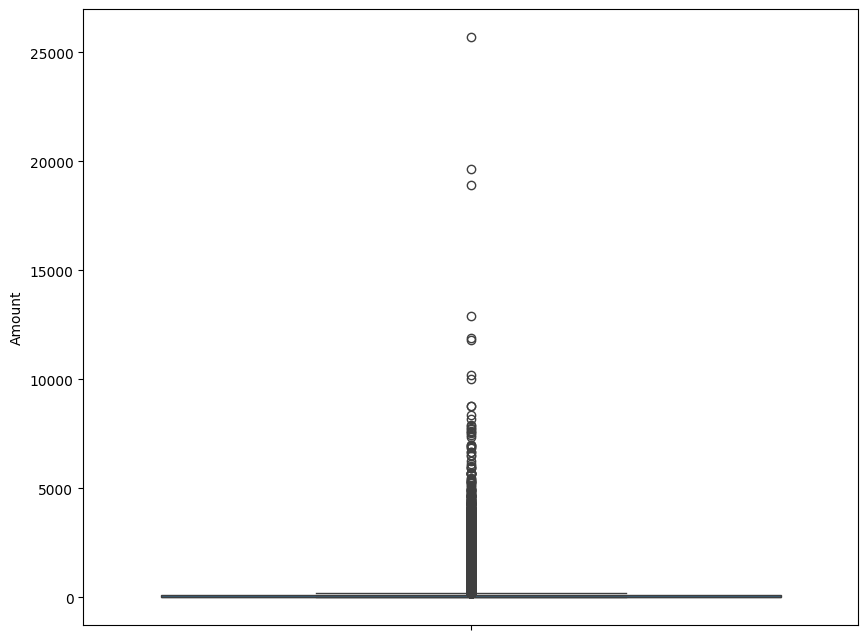

In [6]:
#plot a boxplot to see the distribution of the amount

plt.figure(figsize=(10,8))
sns.boxplot(df['Amount'])
plt.show()

In [7]:
#display examples where the amount is greater than 10000
df['Amount'][df['Amount']>10000]

46841     12910.93
54018     11898.09
58465     19656.53
151296    18910.00
169457    11789.84
274771    25691.16
284249    10199.44
Name: Amount, dtype: float64

In [8]:
# check class distribution
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [9]:
print(df.isnull().sum()[df.isnull().sum()>0]) #no missing values

Series([], dtype: int64)


In [10]:
# check distinct data types
df.dtypes.value_counts()

float64    30
int64       1
Name: count, dtype: int64

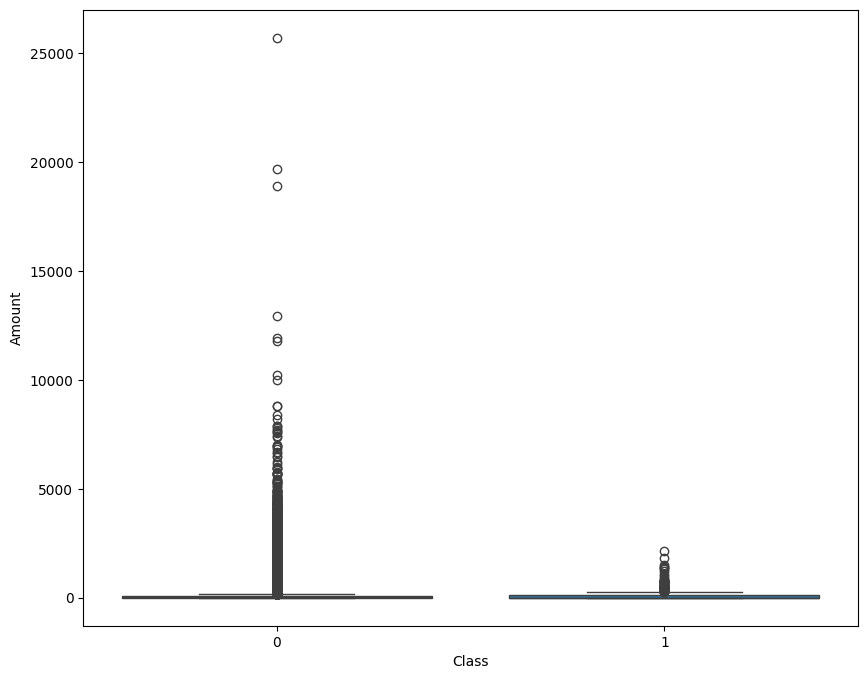

In [11]:
# plot distribution of amount for each class
plt.figure(figsize=(10,8))
sns.boxplot(x='Class', y='Amount', data=df)
plt.show()

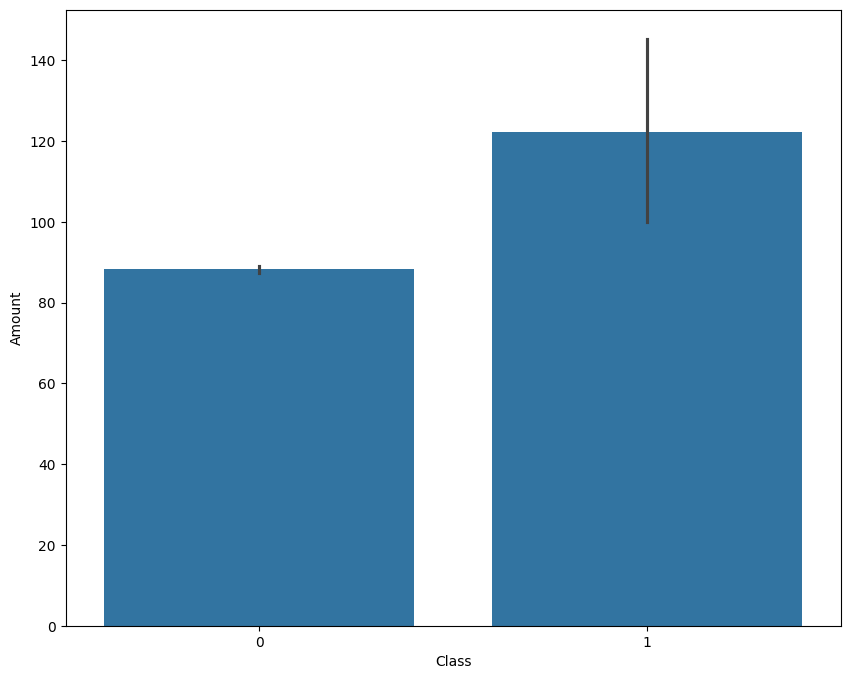

In [13]:
# bar histogram of the amount for each class
plt.figure(figsize=(10,8))
sns.barplot(x='Class', y='Amount', data=df)
plt.show()

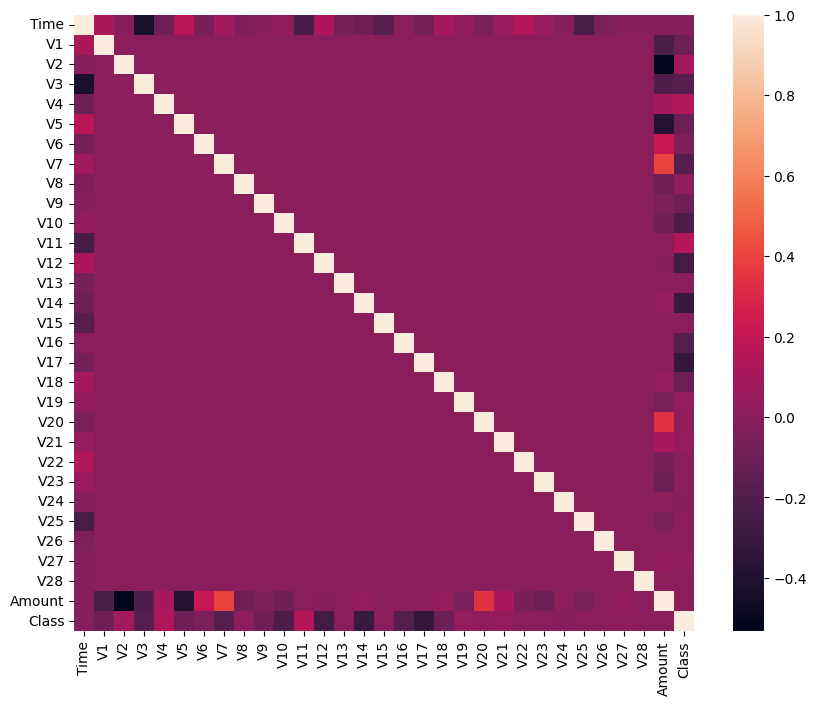

In [14]:
# plot correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())
plt.show()

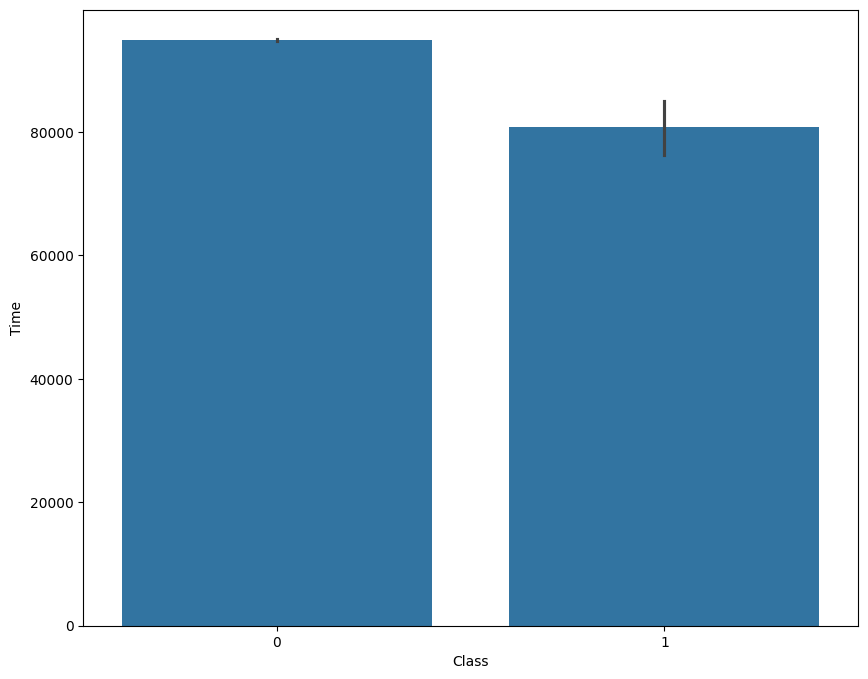

In [15]:
# plot transaction time for each class
plt.figure(figsize=(10,8))    
sns.barplot(x='Class', y='Time', data=df)
plt.show()

In [16]:
# check correlation of time with amount
df[['V7','Amount']].corr() 

,Time,Amount
Time,1.000000,-0.010596
Amount,-0.010596,1.000000


In [17]:
# check if the amount follows a normal distribution
from scipy.stats import shapiro
stat, p = shapiro(df['Amount'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Amount follows a normal distribution')
else:
    print('Amount does not follow a normal distribution')

Statistics=0.310, p=0.000
Amount does not follow a normal distribution


/Users/salmaouardi/Documents/Learning/ml_projects/ml_projects/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 284807.
  res = hypotest_fun_out(*samples, **kwds)


/var/folders/f1/z0hz00wd47g2l6j1_vtwfdmw0000gn/T/ipykernel_11802/1717541872.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Amount_log'])


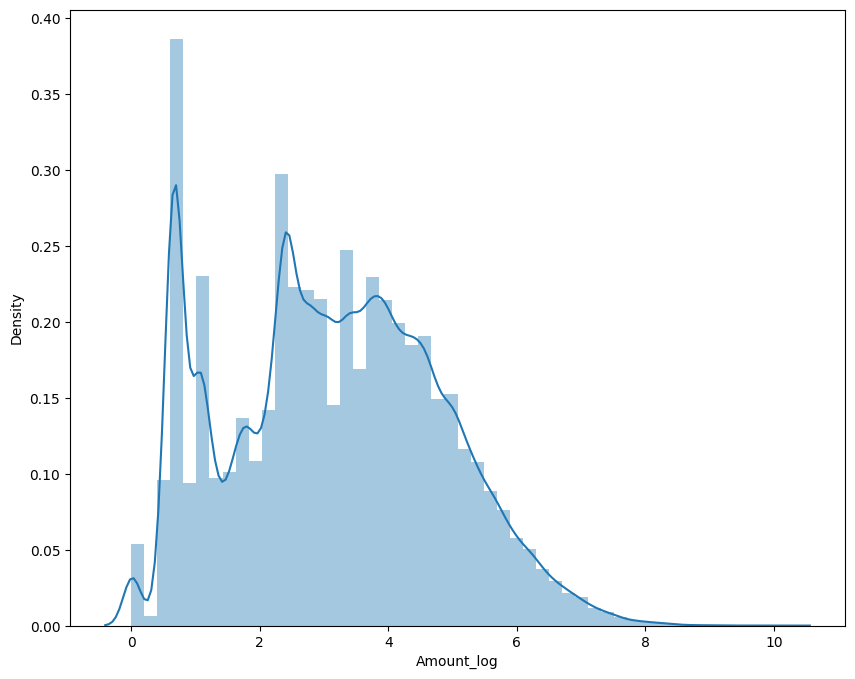

In [28]:
# plot distribution of amount
plt.figure(figsize=(10,8))
sns.distplot(df['Amount_log'])
plt.show()

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Amount_scaled'] = scaler.fit_transform(df[['Amount']])

In [23]:
df.drop('Amount_scaled', axis=1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [27]:
df['Amount_log'] = np.log1p(df['Amount'])